## Prolem Statement: <br>

Most Dominant Online shopping comapny Flipkart is looking to learn more about the hunch
of its consumer so that they can enhance its product handout, elevate customer happiness
and upgrade the overall shopping experience. To further automatically differntiate customer
reviews as Positive, Negative, or Neutral, the organization plans to apply sentiment analysis component.
The dataset was collected from the feedback section of the flipkart.com and flipkart application under each product
the data set consist of product name, reviews, summary and sentiment.<br>
Our sentiment class have three class - Positive , Negative and Neutral.<br>
Business Problems:<br>
1) Customers are unsatisfied<br>
2) To get areas were we lack<br>
3) To gain competative edge in the market<br>

Thus by giving higher quality user satisfaction, and gathering intutive information from their reviews to discover areas in need of outcome, and to make meaningful decisions out of which will help company to grow and gain profit.<br>

Source of the Dataset:- https://www.kaggle.com/code/satyamkhare1193/flipkart-sentiment-analysis-text-classification/input

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Reading Dataset

In [2]:
flip_tweets = pd.read_csv("Dataset-SA.csv")
flip_tweets.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


checking if the dataset has any null values

In [3]:
flip_tweets.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

24664 data is missing in review column and 11 in the target variable

In [4]:
flip_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [5]:
flip_tweets.Sentiment.value_counts()

positive    166581
negative     28232
neutral      10239
Name: Sentiment, dtype: int64

In [6]:
flip_tweets.isnull().sum()/flip_tweets.isnull().count()

product_name     0.000000
product_price    0.000000
Rate             0.000000
Review           0.120282
Summary          0.000054
Sentiment        0.000000
dtype: float64

As only 12% of data is missing from the review column and we don't want to miss any sentiment we will replace the value with mode

In [7]:
flip_tweets[flip_tweets["Review"].isnull()]

,product_name,product_price,Rate,Review,Summary,Sentiment
41625,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,best product,positive
41626,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very good,positive
41627,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very comfortablegood qualitylove it,positive
41628,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very soft and comfortable go for it,positive
41629,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,super product quality is vry good tnx flipkart,positive
...,...,...,...,...,...,...
113340,Men 9325 Latest Collection Stylish Sports Snea...,299,3,NaN,ok oky hai according prise,positive
113341,Men 9325 Latest Collection Stylish Sports Snea...,299,5,NaN,nice,positive
113342,Men 9325 Latest Collection Stylish Sports Snea...,299,5,NaN,nice product,positive
113343,Men 9325 Latest Collection Stylish Sports Snea...,299,3,NaN,nice,positive


In [8]:
flip_tweets["Review"].value_counts()

wonderful                                     9016
not specified                                 8351
brilliant                                     5643
awesome                                       5636
great product                                 5622
                                              ... 
nice to see this product in very less rate       1
best deal in market !!                           1
amazing good for its price                       1
amazing product for its price!!!                 1
product looking very nice & strong quality       1
Name: Review, Length: 1324, dtype: int64

In [9]:
flip_tweets["Review"] = flip_tweets["Review"].fillna(flip_tweets["Review"].mode()[0])
flip_tweets.isnull().sum()

product_name      0
product_price     0
Rate              0
Review            0
Summary          11
Sentiment         0
dtype: int64

In [10]:
flip_tweets[flip_tweets["Summary"].isnull()]

,product_name,product_price,Rate,Review,Summary,Sentiment
11037,SportSoul Cotton Gym & Athletic Abdomen Suppor...,249,4,good choice,NaN,positive
28417,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,perfect product!,NaN,positive
36859,Adrenex by Flipkart Big Bang 6 inch x 26.5 inc...,989,5,great product,NaN,positive
39838,cello ColourUp Hobby Bag of Assorted Stationer...,449,5,perfect product!,NaN,positive
40502,cello ColourUp Hobby Bag of Assorted Stationer...,449,4,good choice,NaN,positive
47616,Men Casual Brown Artificial Leather Money Clip...,159,5,wonderful,NaN,positive
50559,Men Cargos,499,2,wonderful,NaN,neutral
79972,HAIR & CARE Triple Blend Damage Repair Non-Sti...,113,5,must buy!,NaN,neutral
91051,Infinix 10W Quick Charger combo for Infinx dev...,449,5,wonderful,NaN,neutral
95049,Infinix 10W Quick Charger combo for Infinx dev...,449,5,wonderful,NaN,neutral


In [11]:
flip_tweets = flip_tweets.dropna()
flip_tweets.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

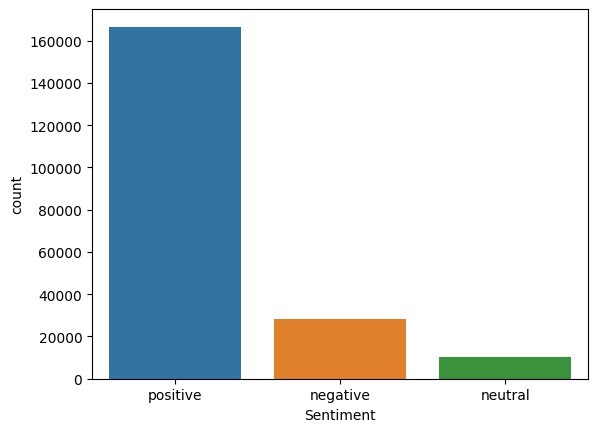

In [12]:
sns.countplot(x = "Sentiment",data = flip_tweets)
pt.show()

As we can wee the data is imbalanced

In [13]:
flip_tweets = flip_tweets.groupby("Sentiment").apply(lambda x: x.sample(flip_tweets["Sentiment"].value_counts().min()))


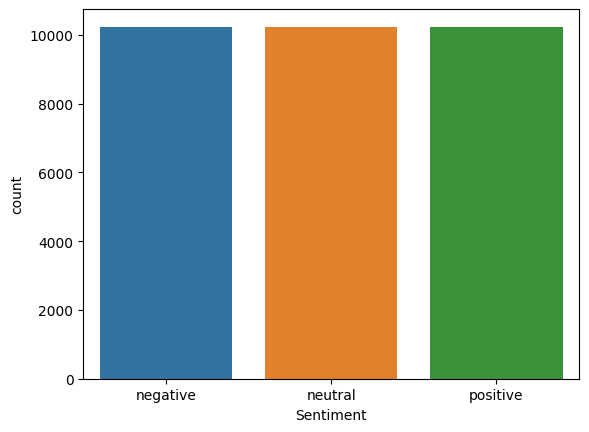

In [14]:
sns.countplot(x = flip_tweets["Sentiment"])
pt.show()

In [15]:
flip_tweets.shape

(30702, 6)

In [16]:
lb = LabelEncoder()
flip_tweets["Sentiment"] = lb.fit_transform(flip_tweets["Sentiment"])
flip_tweets.head()

product_name  \
Sentiment                                                             
negative  46815   Men Casual Brown Artificial Leather Wallet - M...   
          167475       JustandKrafts 75 L Blue Laundry BasketCotton   
          56690          Women Regular Fit Black Georgette Trousers   
          26520   Glun Water Quality Purity Tester 0-990 PPM Dig...   
          123758  PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...   

                 product_price Rate          Review  \
Sentiment                                             
negative  46815            199    2       wonderful   
          167475           298    2     bad quality   
          56690            559    2       wonderful   
          26520            199    1  unsatisfactory   
          123758          6999    4      delightful   

                                                            Summary  Sentiment  
Sentiment                                                                       
negative  46815                                the product not good          0  
          167475          not sturdy lookwise good inside cardboard          0  
          56690   material of the pants is thin doesnt look good...          0  
          26520                                  worst product ever          0  
          123758  product is absolutely good but quality of remo...          0

In [17]:
flip_tweets["Summary"] = flip_tweets["Summary"].str.replace('[{}]'.format(string.punctuation),'')
flip_tweets.head()


product_name  \
Sentiment                                                             
negative  46815   Men Casual Brown Artificial Leather Wallet - M...   
          167475       JustandKrafts 75 L Blue Laundry BasketCotton   
          56690          Women Regular Fit Black Georgette Trousers   
          26520   Glun Water Quality Purity Tester 0-990 PPM Dig...   
          123758  PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...   

                 product_price Rate          Review  \
Sentiment                                             
negative  46815            199    2       wonderful   
          167475           298    2     bad quality   
          56690            559    2       wonderful   
          26520            199    1  unsatisfactory   
          123758          6999    4      delightful   

                                                            Summary  Sentiment  
Sentiment                                                                       
negative  46815                                the product not good          0  
          167475          not sturdy lookwise good inside cardboard          0  
          56690   material of the pants is thin doesnt look good...          0  
          26520                                  worst product ever          0  
          123758  product is absolutely good but quality of remo...          0

In [18]:
flip_tweets["Summary"] = [word.lower() for word in flip_tweets["Summary"]]
flip_tweets.head()


product_name  \
Sentiment                                                             
negative  46815   Men Casual Brown Artificial Leather Wallet - M...   
          167475       JustandKrafts 75 L Blue Laundry BasketCotton   
          56690          Women Regular Fit Black Georgette Trousers   
          26520   Glun Water Quality Purity Tester 0-990 PPM Dig...   
          123758  PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...   

                 product_price Rate          Review  \
Sentiment                                             
negative  46815            199    2       wonderful   
          167475           298    2     bad quality   
          56690            559    2       wonderful   
          26520            199    1  unsatisfactory   
          123758          6999    4      delightful   

                                                            Summary  Sentiment  
Sentiment                                                                       
negative  46815                                the product not good          0  
          167475          not sturdy lookwise good inside cardboard          0  
          56690   material of the pants is thin doesnt look good...          0  
          26520                                  worst product ever          0  
          123758  product is absolutely good but quality of remo...          0

In [19]:
white_space = nltk.tokenize.WhitespaceTokenizer()
lemment = nltk.stem.WordNetLemmatizer()
def lemment_text(t):
  return [lemment.lemmatize(word) for word in white_space.tokenize(t)]
flip_tweets["Summary"] = flip_tweets["Summary"].apply(lemment_text)

In [20]:
flip_tweets.head()

product_name  \
Sentiment                                                             
negative  46815   Men Casual Brown Artificial Leather Wallet - M...   
          167475       JustandKrafts 75 L Blue Laundry BasketCotton   
          56690          Women Regular Fit Black Georgette Trousers   
          26520   Glun Water Quality Purity Tester 0-990 PPM Dig...   
          123758  PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...   

                 product_price Rate          Review  \
Sentiment                                             
negative  46815            199    2       wonderful   
          167475           298    2     bad quality   
          56690            559    2       wonderful   
          26520            199    1  unsatisfactory   
          123758          6999    4      delightful   

                                                            Summary  Sentiment  
Sentiment                                                                       
negative  46815                           [the, product, not, good]          0  
          167475   [not, sturdy, lookwise, good, inside, cardboard]          0  
          56690   [material, of, the, pant, is, thin, doesnt, lo...          0  
          26520                              [worst, product, ever]          0  
          123758  [product, is, absolutely, good, but, quality, ...          0

In [21]:
flip_tweets["Summary"] = flip_tweets["Summary"].apply(lambda x: ' '.join(word for word in x if word not in set(stopwords.words("english")) ))
flip_tweets.head()

product_name  \
Sentiment                                                             
negative  46815   Men Casual Brown Artificial Leather Wallet - M...   
          167475       JustandKrafts 75 L Blue Laundry BasketCotton   
          56690          Women Regular Fit Black Georgette Trousers   
          26520   Glun Water Quality Purity Tester 0-990 PPM Dig...   
          123758  PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...   

                 product_price Rate          Review  \
Sentiment                                             
negative  46815            199    2       wonderful   
          167475           298    2     bad quality   
          56690            559    2       wonderful   
          26520            199    1  unsatisfactory   
          123758          6999    4      delightful   

                                                            Summary  Sentiment  
Sentiment                                                                       
negative  46815                                        product good          0  
          167475              sturdy lookwise good inside cardboard          0  
          56690        material pant thin doesnt look good crop top          0  
          26520                                  worst product ever          0  
          123758  product absolutely good quality remote connect...          0

In [22]:
X = flip_tweets["Summary"]
y = flip_tweets["Sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)

In [23]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(19648,)
(4913,)
(6141,)


In [24]:
TFvector = TfidfVectorizer(analyzer = "word")
X_train_tf = TFvector.fit_transform(X_train)
X_valid_tf = TFvector.transform(X_validation)
X_test_tf = TFvector.transform(X_test)

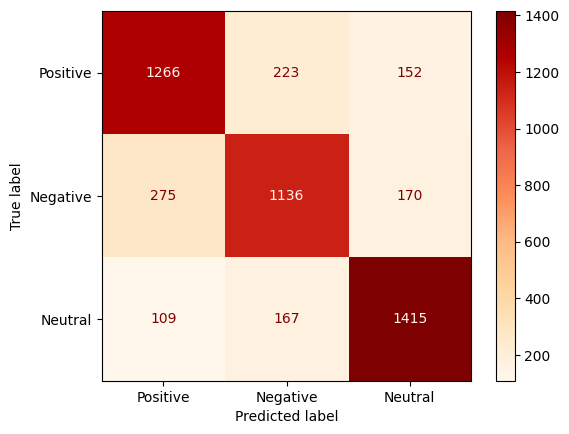

In [25]:

lg = LogisticRegression()
lg.fit(X_train_tf,y_train)
lg_predict = lg.predict(X_valid_tf)
conf_log = confusion_matrix(y_validation,lg_predict)
log_dis = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_log,display_labels=["Positive","Negative","Neutral"])
log_dis.plot(cmap = "OrRd")
pt.show()

In [26]:
print(accuracy_score(y_validation,lg_predict))

0.7769183798086708


In [27]:
print(classification_report(y_validation,lg_predict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1641
           1       0.74      0.72      0.73      1581
           2       0.81      0.84      0.83      1691

    accuracy                           0.78      4913
   macro avg       0.78      0.78      0.78      4913
weighted avg       0.78      0.78      0.78      4913



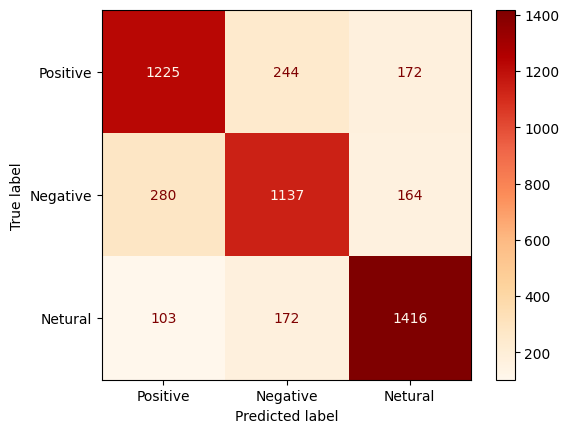

In [28]:
svc = SVC(kernel='linear')
svc.fit(X_train_tf,y_train)
svc_predict = svc.predict(X_valid_tf)
svc_con = confusion_matrix(y_validation,svc_predict)
svc_dis = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_con,display_labels=["Positive","Negative","Netural"])
svc_dis.plot(cmap = "OrRd")
pt.show()

In [29]:
print(accuracy_score(y_validation,svc_predict))

0.7689802564624466


In [30]:
print(classification_report(y_validation,svc_predict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1641
           1       0.73      0.72      0.73      1581
           2       0.81      0.84      0.82      1691

    accuracy                           0.77      4913
   macro avg       0.77      0.77      0.77      4913
weighted avg       0.77      0.77      0.77      4913



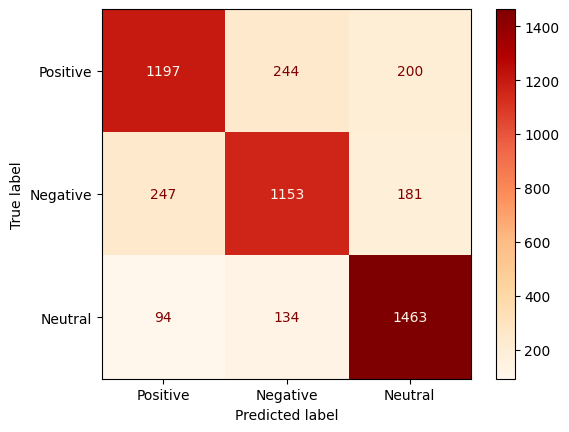

In [31]:
random_f = RandomForestClassifier()
random_f.fit(X_train_tf,y_train)
random_predict = random_f.predict(X_valid_tf)
ran_con = confusion_matrix(y_validation,random_predict)
ran_display = metrics.ConfusionMatrixDisplay(confusion_matrix= ran_con,display_labels = ["Positive","Negative","Neutral"])
ran_display.plot(cmap = "OrRd")
pt.show()


In [32]:
print(accuracy_score(y_validation,random_predict))

0.7761042133116223


In [33]:
print(classification_report(y_validation,random_predict))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1641
           1       0.75      0.73      0.74      1581
           2       0.79      0.87      0.83      1691

    accuracy                           0.78      4913
   macro avg       0.77      0.77      0.77      4913
weighted avg       0.78      0.78      0.77      4913



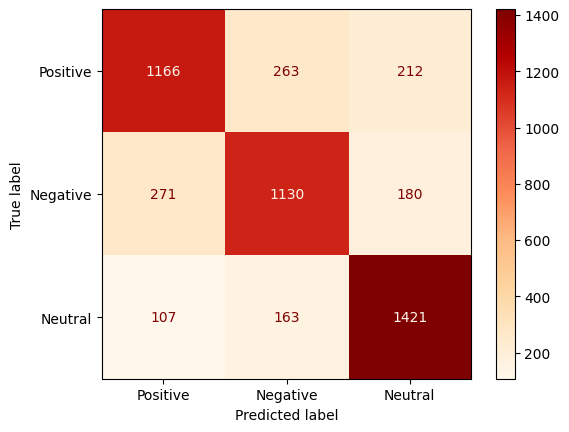

In [34]:
decsion_tree = DecisionTreeClassifier()
decsion_tree.fit(X_train_tf,y_train)
decision_tree_predict = decsion_tree.predict(X_valid_tf)
dec_con = confusion_matrix(y_validation,decision_tree_predict)
dec_display = metrics.ConfusionMatrixDisplay(confusion_matrix=dec_con,display_labels=["Positive","Negative","Neutral"])
dec_display.plot(cmap = "OrRd")
pt.show()

In [35]:
print(accuracy_score(y_validation,decision_tree_predict))

0.7565642173824547


In [36]:
print(classification_report(y_validation,decision_tree_predict))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1641
           1       0.73      0.71      0.72      1581
           2       0.78      0.84      0.81      1691

    accuracy                           0.76      4913
   macro avg       0.76      0.76      0.75      4913
weighted avg       0.76      0.76      0.76      4913



### HyperParameter tunning

In [37]:
import warnings
warnings.filterwarnings("ignore")
parameters = [
    {"penalty":["l1","l2","none"],
     "max_iter": [100,500,1000]}

]
lg1 = LogisticRegression()
grid_search = GridSearchCV(lg1,param_grid = parameters,cv= 5)
grid_search.fit(X_train_tf,y_train)
best_parameters1 = grid_search.best_params_

In [38]:
lg1 = LogisticRegression(**best_parameters1)
lg1.fit(X_train_tf,y_train)
lg1_para_pred = lg1.predict(X_valid_tf)
print(accuracy_score(y_validation,lg1_para_pred))

0.7769183798086708


In [39]:
print(classification_report(y_validation,lg1_para_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1641
           1       0.74      0.72      0.73      1581
           2       0.81      0.84      0.83      1691

    accuracy                           0.78      4913
   macro avg       0.78      0.78      0.78      4913
weighted avg       0.78      0.78      0.78      4913



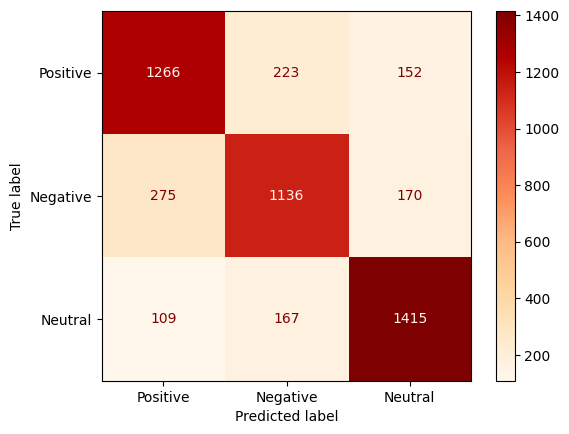

In [40]:
from sklearn import metrics
conf_log = confusion_matrix(y_validation,lg1_para_pred)
log_dis = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_log,display_labels=["Positive","Negative","Neutral"])
log_dis.plot(cmap = "OrRd")
pt.show()

In [41]:
parameters = {
    "n_estimators": [i for i in range(5,100,5)],
    "max_depth":[5,10,15,20]
}
reg1 = RandomForestClassifier()
ran = RandomizedSearchCV(estimator= reg1,param_distributions=parameters,cv=3)
ran.fit(X_train_tf,y_train)
best_parameter = ran.best_params_

In [42]:
reg1 = RandomForestClassifier(**best_parameter)
reg1.fit(X_train_tf,y_train)
regress_pred = reg1.predict(X_valid_tf)
print(accuracy_score(y_validation,regress_pred))

0.7573783838795034


In [43]:
print(classification_report(y_validation,regress_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73      1641
           1       0.71      0.74      0.72      1581
           2       0.78      0.86      0.81      1691

    accuracy                           0.76      4913
   macro avg       0.76      0.76      0.75      4913
weighted avg       0.76      0.76      0.76      4913



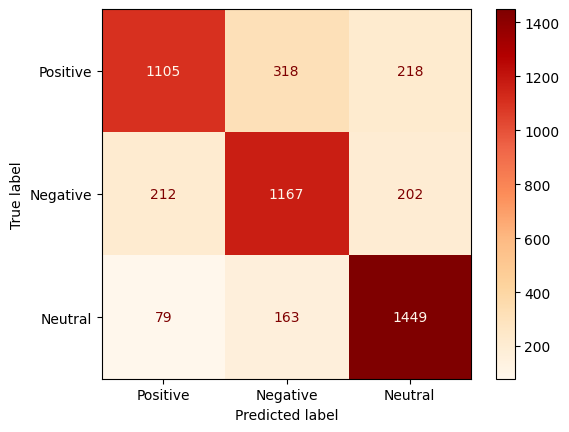

In [44]:
ran_con1 = confusion_matrix(y_validation,regress_pred)
ran_disply1 = metrics.ConfusionMatrixDisplay(confusion_matrix=ran_con1,display_labels=["Positive","Negative","Neutral"])
ran_disply1.plot(cmap = "OrRd")
pt.show()

In [45]:
parameters = {
    "max_depth": [2,4,6,8,10],
    "min_samples_leaf": [3,6,9,12],
    "criterion" : ["gini","entropy"]

}
dec = DecisionTreeClassifier()
grid1 = GridSearchCV(estimator=dec,param_grid=parameters,cv=5)
grid1.fit(X_train_tf,y_train)
best_parameter2 = grid1.best_params_

In [46]:
dec = DecisionTreeClassifier(**best_parameter2)
dec.fit(X_train_tf,y_train)
dec_pred = dec.predict(X_valid_tf)
print(accuracy_score(y_validation,dec_pred))

0.6358640341949928


In [47]:
print(classification_report(y_validation,dec_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57      1641
           1       0.49      0.88      0.63      1581
           2       0.78      0.62      0.69      1691

    accuracy                           0.64      4913
   macro avg       0.73      0.64      0.63      4913
weighted avg       0.73      0.64      0.63      4913



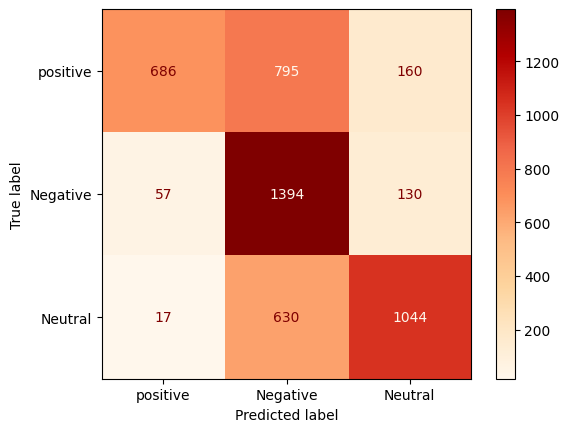

In [48]:
dec_con1 = confusion_matrix(y_validation,dec_pred)
dec_display = metrics.ConfusionMatrixDisplay(confusion_matrix=dec_con1,display_labels=["positive","Negative","Neutral"])
dec_display.plot(cmap = "OrRd")
pt.show()

In [49]:
parameters = {
    "C" :[0.1,1,10],
    "gamma" : [1,0.1]

}
svc1 = SVC()
svc_grid = GridSearchCV(svc1,param_grid = parameters,cv=5)
svc_grid.fit(X_train_tf,y_train)
best_svc_param = svc_grid.best_params_



In [50]:
svc2 = SVC(**best_svc_param)
svc2.fit(X_train_tf,y_train)
svc2_pred = svc2.predict(X_valid_tf)
print(accuracy_score(y_validation,svc2_pred))

0.7824140036637492


In [51]:
print(classification_report(y_validation,svc2_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1641
           1       0.74      0.74      0.74      1581
           2       0.81      0.86      0.84      1691

    accuracy                           0.78      4913
   macro avg       0.78      0.78      0.78      4913
weighted avg       0.78      0.78      0.78      4913



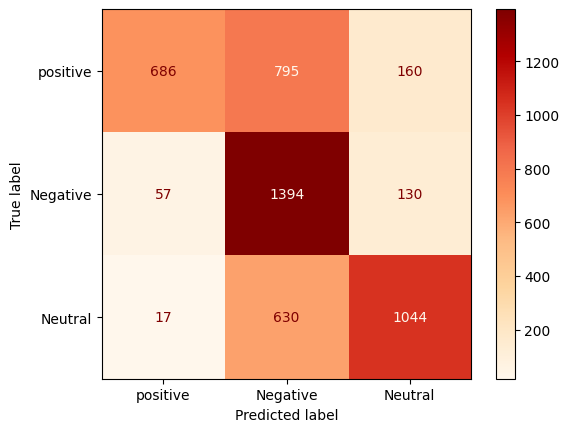

In [52]:
svc_con1 = confusion_matrix(y_validation,svc2_pred)
svc_display = metrics.ConfusionMatrixDisplay(confusion_matrix=dec_con1,display_labels=["positive","Negative","Neutral"])
svc_display.plot(cmap = "OrRd")
pt.show()

## Evaluation with testing data

In [53]:
lg1_pred_test = lg1.predict(X_test_tf)
print(accuracy_score(y_test,lg1_pred_test))

log_con = confusion_matrix(y_test,lg1_pred_test)

0.777723497801661


In [54]:
print(classification_report(y_test,lg1_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2080
           1       0.76      0.73      0.74      2063
           2       0.80      0.83      0.81      1998

    accuracy                           0.78      6141
   macro avg       0.78      0.78      0.78      6141
weighted avg       0.78      0.78      0.78      6141



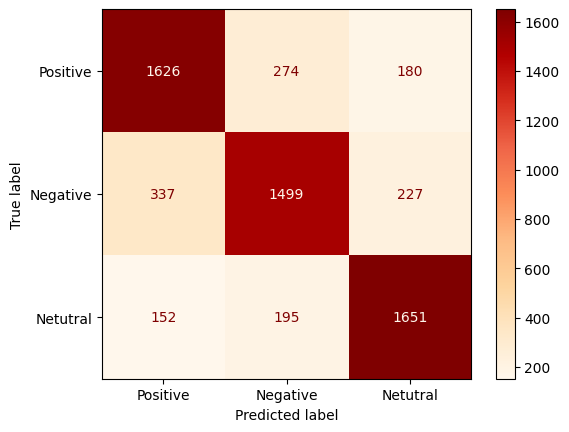

In [55]:
test_display = metrics.ConfusionMatrixDisplay(confusion_matrix=log_con,display_labels=["Positive","Negative","Netutral"])
test_display.plot(cmap= "OrRd")
pt.show()

Accurcay, Precision and Recall score for all the above models

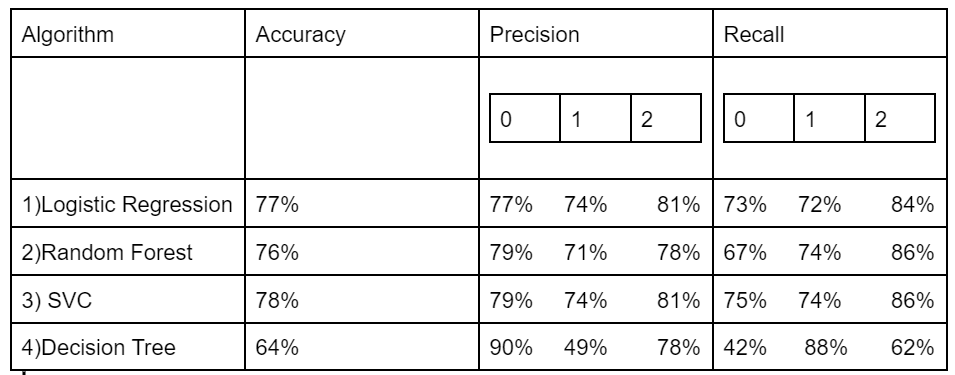

## Conclusion:<br>
We can see that Logistic regression and SVC are the 2 models which are giving almost equal percentage of accuracy rate but the precision and recall score of the svc file is not that accurate as that of Logistic regression. Therefore for test evaluation we used logistic regression as our model and got an accuracy of 77% with 1598, 1494 and 1670 reviwes sentimented positive, negative and neutral correctly.

## Recommendation: <br>
1) We can work on the customer feedback to get more precise data.<br>
2) Product quality can be increased.<br>
3) Need to use negative feedback more accurately to improve the experience of customer.<br>
4) With sentiment analysis use the customer insights on the product.


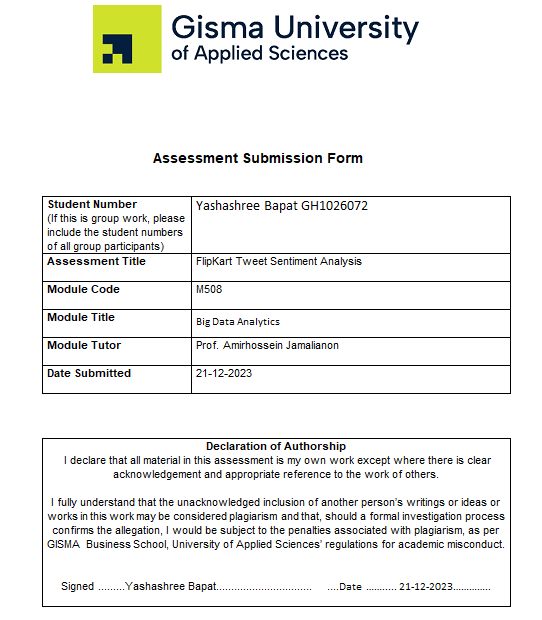

In [58]:
%%shell
jupyter nbconvert FlipKart_tweets.ipynb --to html

[NbConvertApp] Converting notebook FlipKart_tweets.ipynb to html
[NbConvertApp] Writing 1207143 bytes to FlipKart_tweets.html
